# Generate all figures

All generated figures are saved to `figures`.

## To do
- Add remaining figures
- Clean up plotting object
- Add docstrings and comments
- Add figure references (will wait until paper is published)

## Import all requirements

In [43]:
%%capture
%load_ext autoreload
%autoreload 2

from src import classify_edges
from src.export import export_graphs, export_matrices
from src.figures import (
    uniform_growth, nonuniform_synapse_addition, connection_classification_counts,
    variable_connections, changing_connections_prevalence, feedforward, modules
)

# Classify connections as 'stable', 'developmentally dynamic', or 'variable'.
edge_classifications, edge_pair_classifications = classify_edges.classify_edges()

## Volumetric models

1. Export models from [VAST](https://doi.org/10.3389/fncir.2018.00088) to .obj files.
2. Run `src/volumetric_models/zbrush_smooth.py` to create a script for ZBrush.
3. In Zbrush, under Zscript/Load, open the script generate above named "zbrush_script.txt".
4. Press "H" to show loaded scripts, then click the button "SmoothObjects" to run the smoothing.
5. In [Blender ](https://www.blender.org/), import the smoothed models using `src/volumetric_models/blender_import.py`

![volumetric model](figures/volumetric_models/3D_model_Dataset8.png)

## Connectome networks

1. Export graphs into a graphml format using `export.export_graphs_for_cytoscape`.
2. Import the graphs into cytoscape. 
3. Set the node and edge parameters as you see fit.

In [4]:
save_to = 'figures/graphs'
export_graphs.export_graphs_for_cytoscape(save_to, edge_classifications)

x range: -0.02023019527209274 0.03457753594939801
y range: -1.7253534211408061 2.1517340229500017
Saved to `figures/exports/graphs_for_cytoscape.graphml`


## Uniform neurite growth maintains brain geometry

Saved to `figures/uniform_growth/_cable_length`:


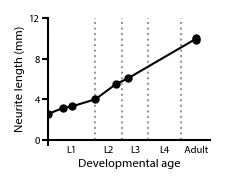

2.54 -> 9.99
Mean increase: 4.79 +- 3.88
Saved to `figures/uniform_growth/_stable_contacts`:


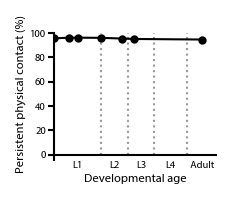

Saved to `figures/uniform_growth/_number_of_synapses`:


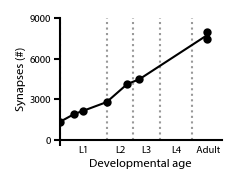

1296.00 -> 7970.00
Mean factor: 3.33 +- 3.35
Saved to `figures/uniform_growth/_synapse_density`:


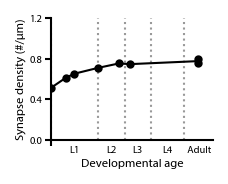

In [35]:
fig = uniform_growth.Figure('figures/uniform_growth')

fig.cable_length('')
fig.proportion_of_stable_contacts('')
fig.number_of_synapses('')
fig.synapse_density('')

## Non-uniform synapse addition reshapes the connectome

Saved to `figures/non-uniform_synapse_addition/_number_of_connections`:


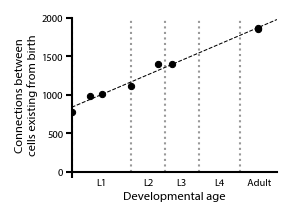

Synapses enforcing existing connections: 4499.0 0.7920077457970249
Synapses making new connections: 1181.5 0.2079922542029751
775.00 -> 1867.00
Factor: 2.41
Saved to `figures/non-uniform_synapse_addition/_synapses_per_connection`:


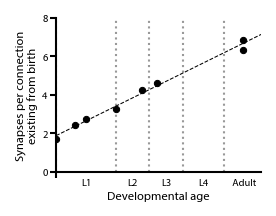

p: 0.00045461505140964044 , r: 0.8727272727272729 , n: 11
Saved to `figures/non-uniform_synapse_addition/_connection_probability`:


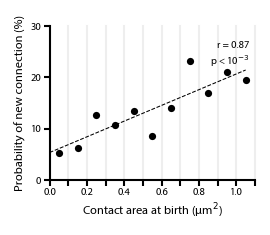

p: 0.017100948317245186 , r: -0.20055420658985404 , n: 141
Saved to `figures/non-uniform_synapse_addition/_correlate_centrality_output_synapse`:


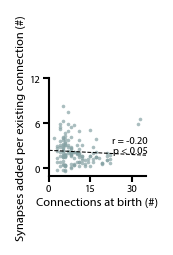

p: 1.1372174042120641e-05 , r: 0.33339583436291764 , n: 166
Saved to `figures/non-uniform_synapse_addition/_correlate_centrality_input_synapse`:


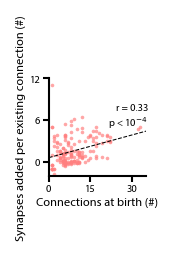

p: 0.1786101294121783 , r: 0.11391831506345668 , n: 141
Saved to `figures/non-uniform_synapse_addition/_correlate_centrality_output_degree`:


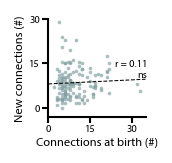

p: 1.3341453551970446e-07 , r: 0.39552107219927973 , n: 166
Saved to `figures/non-uniform_synapse_addition/_correlate_centrality_input_degree`:


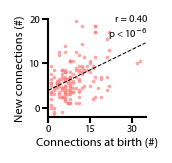

Saved to `figures/non-uniform_synapse_addition/_hebbian_plasticity`:


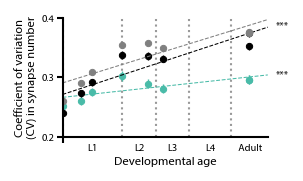

spearmanr 5.296153515644831e-07 0.9940297973880049 8
Saved to `figures/non-uniform_synapse_addition/_hebbian_plasticity_inset`:


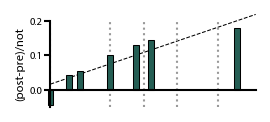

In [47]:
fig = nonuniform_synapse_addition.Figure('figures/non-uniform_synapse_addition')

fig.number_of_connections('')
fig.edge_changes('')
fig.new_edge_contacts('')
fig.correlate_centrality_with_growth('', increase='synapse', input_output='output')
fig.correlate_centrality_with_growth('', increase='synapse', input_output='input')
fig.correlate_centrality_with_growth('', increase='degree', input_output='output')
fig.correlate_centrality_with_growth('', increase='degree', input_output='input')
fig.hebbian_plasticity('', quantify_slope=False)

## Isogenic individuals have both stereotyped and variable connections

Saved to `figures/connection_classification_counts/_edge_classification_counts_synapses`:


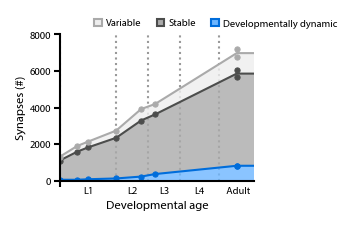

Saved to `figures/connection_classification_counts/_edge_classification_counts_connections`:


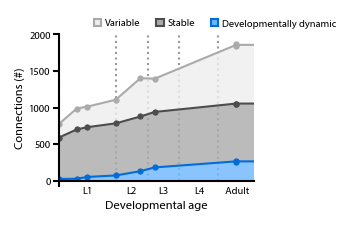

In [18]:
fig = connection_classification_counts.Figure(
    'figures/connection_classification_counts', page_size=4.72441
)

for dataset in ('Dataset2', 'Dataset5' ,'Dataset8'):
    fig.list_connections_between_neurons('', edge_classifications, dataset)
    
fig.edge_classification_count('', edge_classifications, edge_pair_classifications, 'synapses')
fig.edge_classification_count('', edge_classifications, edge_pair_classifications, 'connections')

## Variable connections are not uniformly distributed among cell types

Corrected p-values: [1.09959834e-02 3.27082443e-03 8.55854849e-08 2.60208827e-08
 2.36664079e-07]
n: [57, 22, 34, 30]
Saved to `figures/variable_connections/_variable_edge_prevalence_quantified`:


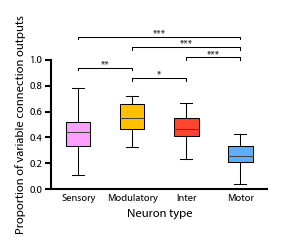

Corrected p-values: [1.07059836e-01 7.70514739e-03 2.02532752e-01 4.03487384e-07
 1.81043248e-05 6.40482774e-08 3.43647569e-09]
n: [57, 23, 44, 38, 32]
Saved to `figures/variable_connections/_variable_edge_prevalence_quantified_in`:


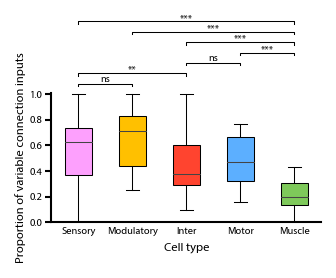

In [24]:
fig = variable_connections.Figure('figures/variable_connections')

fig.variable_edge_prevalence_quantified('', edge_classifications, inputs=False)
fig.variable_edge_prevalence_quantified('', edge_classifications, inputs=True)

## Interneuron connections are stable during maturation

In [31]:
fig = changing_connections_prevalence.Figure('figures/changing_connections_prevalence')

fig.changes_type_overrepresentation('by_synapse_count', edge_classifications)

Statistically significant over- or underrepresentation:
inter_inter under p = 1.9754112353343393e-05 n = 160
inter_motor under p = 0.04198245113890283 n = 52
motor_muscle over p = 0.03198261740089399 n = 145
modulatory_muscle over p = 0.0061483325971010945 n = 10
sensory_muscle over p = 0.03912914268373881 n = 6


## Increase in both feedforward signal flow across maturation

Corrected p-values: [0.13580618 0.00075006 0.00059904]
n: [301, 229, 107]
Saved to `figures/feedforward/_feedforward_stable_increase`:


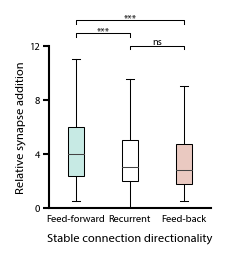

(('Feed-back', [128, 27, 6]), ('Recurrent', [269, 53, 10]), ('Feed-forward', [340, 118, 2]))
[0.0015336  0.00318665]
Saved to `figures/feedforward/_feedforward_edge_proportion`:


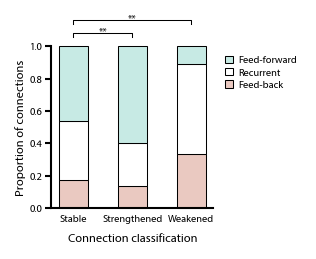

Corrected p-values: 0.017164147499911832
Corrected p-values: 0.00019645676493361796
Corrected p-values: 0.10772123669287088
Saved to `figures/feedforward/_feedforward_global_shift`:


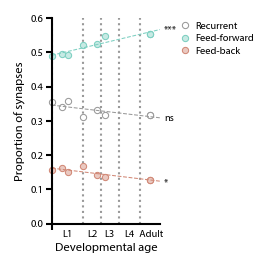

In [38]:
fig = feedforward.Figure('figures/feedforward')

fig.feedforward_stable_increase('', edge_classifications)
fig.feedforward_edge_proportion('', edge_classifications)
fig.feedforward_global_shift('')

## Increase in modularity across maturation

To determine modules by weighted stochastic blockmodeling:

1. Export matrices to mat files using `export_matrices.export_to_matlab('data/WSBM', edge_classifications)`.
2. 

Saved to `figures/modules/_community_overview`:


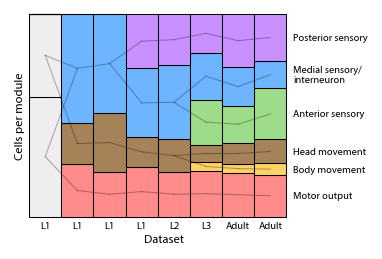

In [45]:
fig = modules.Figure('figures/modules')

fig.modules_across_development('')